<a href="https://colab.research.google.com/github/AnishTeku/DataScienceFinalProjet-JP-Morgan-forecasting-/blob/main/22013306_PROJECT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('/content/JPM-Multiverse.csv')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-01-02,36.56,37.07,36.53,36.62,20.83,9280500
1,2004-01-05,36.66,36.86,36.30,36.55,20.79,9715400
2,2004-01-06,37.15,37.57,37.09,37.47,21.32,21209800
3,2004-01-07,37.50,38.09,37.49,38.02,21.63,14472600
4,2004-01-08,38.10,38.77,38.06,38.67,22.00,11834300
5,2004-01-09,38.40,39.14,38.35,38.76,22.05,10569000
6,2004-01-12,38.50,39.15,38.42,38.79,22.07,7044400
7,2004-01-13,38.80,38.95,38.45,38.90,22.13,7205200
8,2004-01-14,39.08,39.33,38.93,39.22,22.31,8672300
9,2004-01-15,39.85,39.95,38.70,38.92,22.14,50329900


In [5]:
data.info()
data.describe()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5221 entries, 0 to 5220
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5221 non-null   object 
 1   Open       5221 non-null   float64
 2   High       5221 non-null   float64
 3   Low        5221 non-null   float64
 4   Close      5221 non-null   float64
 5   Adj Close  5221 non-null   float64
 6   Volume     5221 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 285.6+ KB


(5221, 7)

## **Data Preparation and understanding**

In [6]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Check for missing values in the dataset
missing_values = data.isnull().sum()
missing_values


,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


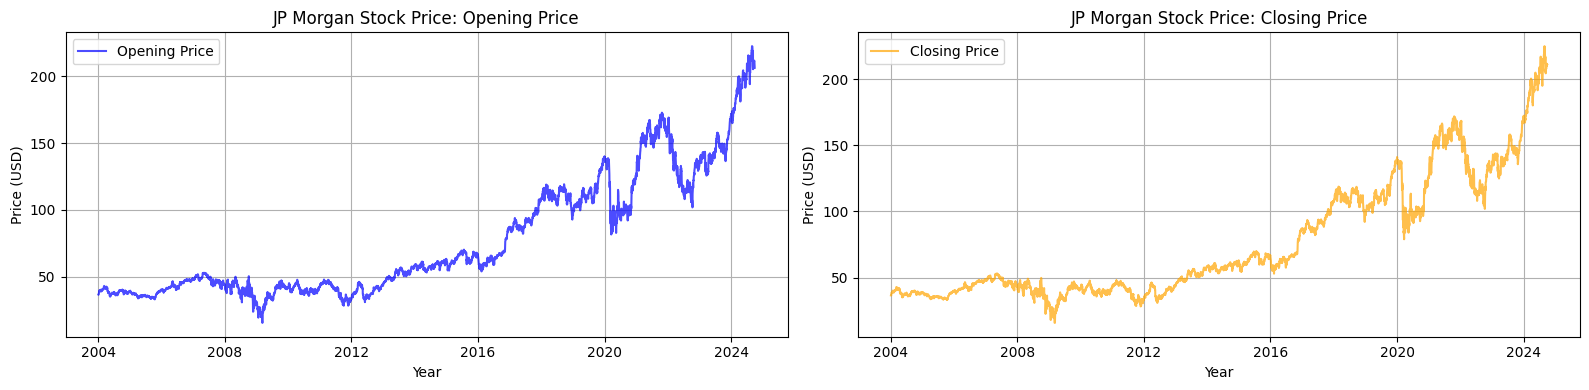

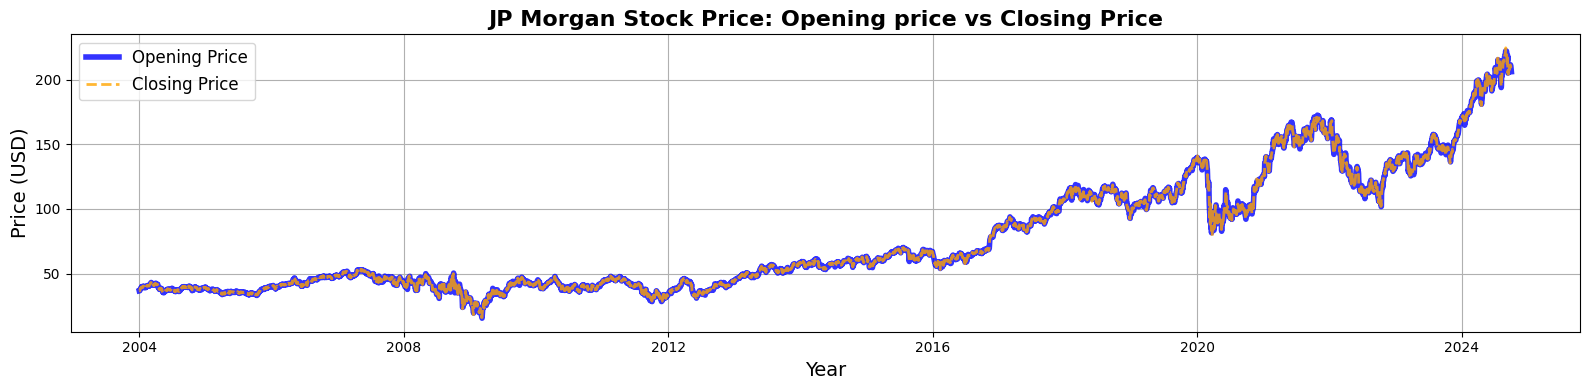

In [7]:
import matplotlib.pyplot as plt

# Creating subplots for Opening and Closing prices
fig, jp = plt.subplots(1, 2, figsize=(16, 4), sharex=True)

# Plot for Opening Price
jp[0].plot(data.index, data['Open'], label='Opening Price', color='blue', linestyle='-', alpha=0.7)
jp[0].set_title("JP Morgan Stock Price: Opening Price")
jp[0].set_xlabel("Year")
jp[0].set_ylabel("Price (USD)")
jp[0].legend()
jp[0].grid(True)

# Plot for Closing Price
jp[1].plot(data.index, data['Close'], label='Closing Price', color='orange', linestyle='-', alpha=0.7)
jp[1].set_title("JP Morgan Stock Price: Closing Price")
jp[1].set_xlabel("Year")
jp[1].set_ylabel("Price (USD)")
jp[1].legend()
jp[1].grid(True)

plt.tight_layout()
plt.show()

#Extracting Opening and Closing prices for the plot
Opening_Price = data['Open']
closing_Price = data['Close']

# Plotting the Opening price vs Closing price
plt.figure(figsize=(16, 4))
plt.plot(Opening_Price, label='Opening Price', color='blue', linewidth=4, alpha=0.8)
plt.plot(closing_Price, label='Closing Price', color='orange', linestyle='--', linewidth=2, alpha=0.8)
plt.title('JP Morgan Stock Price: Opening price vs Closing Price', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


The plot of JP Morgan's stock prices from 2004 to 2024 reveals a general upward trajectory, with notable dips during the 2008 Great Recession and the 2020 COVID-19 pandemic, both of which significantly impacted stock performance. Despite these downturns, the stock showed resilience, with strong recovery phases evident post-2009 and post-2020. The closing prices closely track the opening prices, suggesting relative intraday stability, with only minor differences between them on most days. Peaks in the stock price are observed in recent years, particularly around 2023-2024, indicating strong performance and investor confidence. Overall, the stock's trend highlights JP Morgan's capacity to recover and grow even after significant economic challenges.

# **EDA**

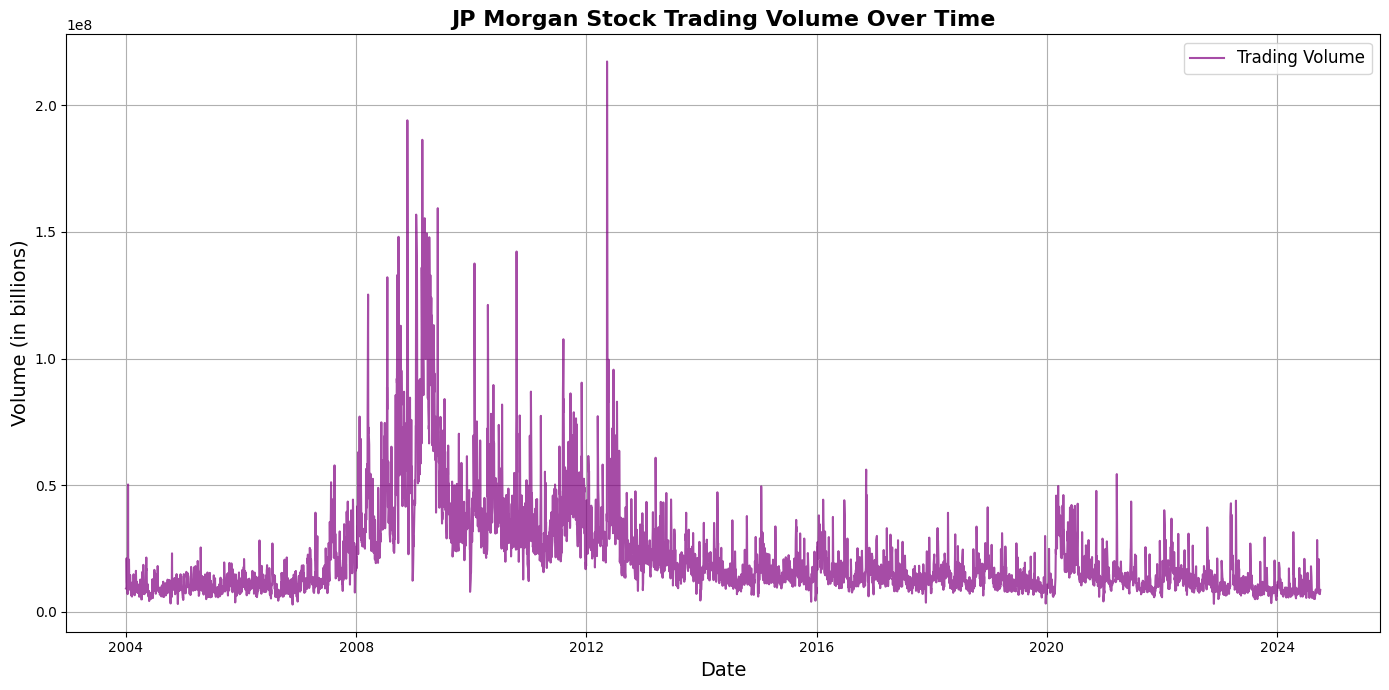

In [8]:
# Plotting Trading Volume Trends over Time
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Volume'], label='Trading Volume', color='purple', alpha=0.7)
plt.title("JP Morgan Stock Trading Volume Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Volume (in billions)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


The trading volume peaked significantly around 2008-2010, which aligns with the Great Recession period. This suggests increased trading activity during periods of economic uncertainty, likely driven by high volatility and investor reactions.


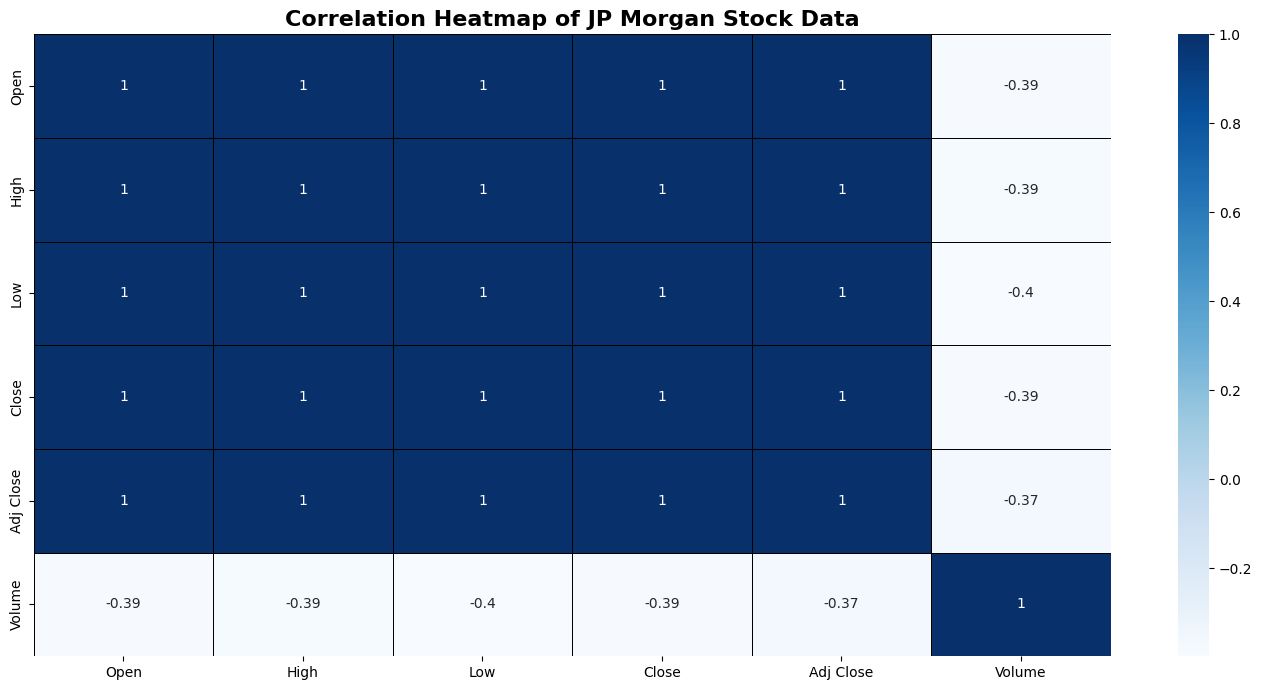

In [9]:
# Correlation Analysis between different numerical features
correlation_matrix = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

# Plotting a Heatmap for Correlation
plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5, linecolor='black')
plt.title("Correlation Heatmap of JP Morgan Stock Data", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

- The heatmap shows very strong correlations between Open, High, Low, Close, and Adj Close prices (correlation = 1), indicating that these features move together closely.

- The Volume has a moderate negative correlation (around -0.39 to -0.40) with price features, implying that high trading volumes may often be associated with lower prices, possibly reflecting heightened selling pressure.


# **Model Selection**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Data Preparation for Model Training

# Select the features for the models
features = data[['Open', 'High', 'Low', 'Volume']]
target = data['Close']

# Splitting data into train, validation, and test sets
train_data, temp_data, train_target, temp_target = train_test_split(features, target, test_size=0.3, shuffle=False)
val_data, test_data, val_target, test_target = train_test_split(temp_data, temp_target, test_size=0.5, shuffle=False)

# Scaling features using MinMaxScaler for better convergence
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler on the training data
train_data_scaled = scaler.fit_transform(train_data)
val_data_scaled = scaler.transform(val_data)
test_data_scaled = scaler.transform(test_data)

# Displaying the shape of the datasets to confirm the splits
(train_data_scaled.shape, val_data_scaled.shape, test_data_scaled.shape)


((3654, 4), (783, 4), (784, 4))

The data has been successfully split and scaled:

**Training Set:** 3,654 observations (70%)

**Validation Set:** 783 observations (15%)

**Test Set:** 784 observations (15%)


#ARIMA Model

In [11]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.6 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18923.746, Time=12.72 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18999.174, Time=0.25 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18978.889, Time=0.41 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18980.735, Time=1.34 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18999.784, Time=0.25 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=18971.818, Time=7.09 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=18972.723, Time=4.78 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=18971.524, Time=5.65 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=18923.643, Time=9.20 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=18952.420, Time=2.66 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=18925.300, Time=11.66 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=18925.581, Time=7.10 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=18937.616, Time=9.10 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=18924.400, Time=9.34 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0]             : AIC=18924.413, Time=4.02 sec

Best model:  ARIMA(2,1,3)(0,0,0)[0] intercept
Total fit time: 85.612 seconds
Optimal ARIMA Order: (2, 1, 3)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

MAE: 57.61653640405554, RMSE: 64.03282262475443
Mean Absolute Error (MAE): 0.6531249649929886
Root Mean Squared Error (RMSE): 1.1442961420162334
R-squared (R2): 0.9965191724497681


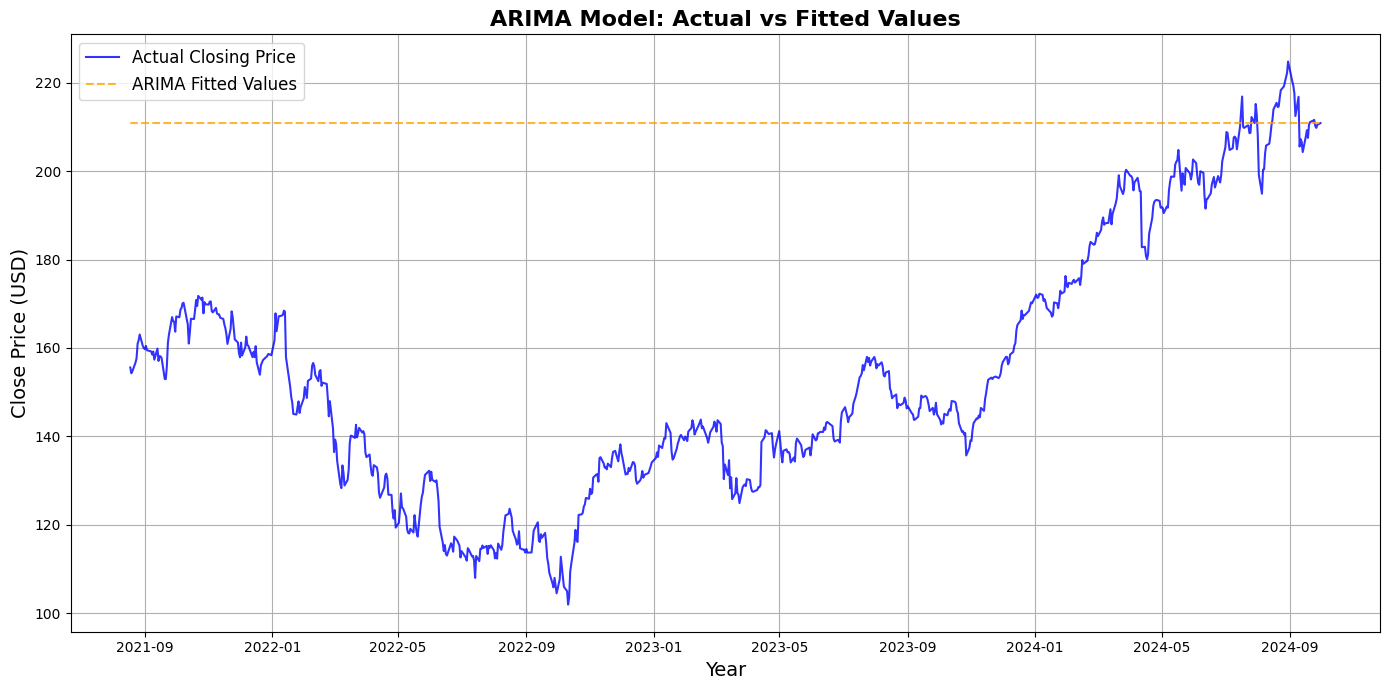

In [12]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use the 'Close' column for ARIMA
close_prices = data['Close']

forecast_scaler = MinMaxScaler()
forecast_scaler.fit(train_target.values.reshape(-1,1))

# Find the optimal parameters using auto_arima
auto_arima_model = auto_arima(close_prices, seasonal=False, stepwise=True, suppress_warnings=True, trace=True)
optimal_order = auto_arima_model.order
print(f"Optimal ARIMA Order: {optimal_order}")


# Fit the ARIMA model
arima_model = ARIMA(close_prices, order=optimal_order)
arima_fit = arima_model.fit()

# Forecast on test set
test_forecast = arima_fit.forecast(steps=len(test_target))
test_forecast_inversed = forecast_scaler.inverse_transform(test_forecast.values.reshape(-1, 1))

# Evaluate model
test_actual = forecast_scaler.inverse_transform(test_forecast.values.reshape(-1,1))
#mae = np.mean(np.abs(test_target.values.reshape(-1,1) - test_forecast_inversed))
#rmse = np.sqrt(np.mean((test_target.values.reshape(-1,1) - test_forecast_inversed)**2))
mae = mean_absolute_error(test_target, test_forecast)
rmse = np.sqrt(mean_squared_error(test_target, test_forecast))
print(f"MAE: {mae}, RMSE: {rmse}")

# Calculate metrics on training data
mae = mean_absolute_error(train_target, arima_fit.predict(start=0, end=train_target.index[-1]))
rmse = np.sqrt(mean_squared_error(train_target, arima_fit.predict(start=0, end=train_target.index[-1])))
r2 = r2_score(train_target, arima_fit.predict(start=0, end=train_target.index[-1]))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Plotting Actual vs Fitted Values for the ARIMA model
plt.figure(figsize=(14, 7))
plt.plot(test_target.index, test_target, label='Actual Closing Price', color='blue', alpha=0.8)
plt.plot(test_target.index, test_forecast,  label='ARIMA Fitted Values', color='orange', linestyle='--', alpha=0.8)#arima_fit.predict(start=train_target.index[0], end=train_target.index[-1]),
plt.title("ARIMA Model: Actual vs Fitted Values", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Close Price (USD)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()




/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


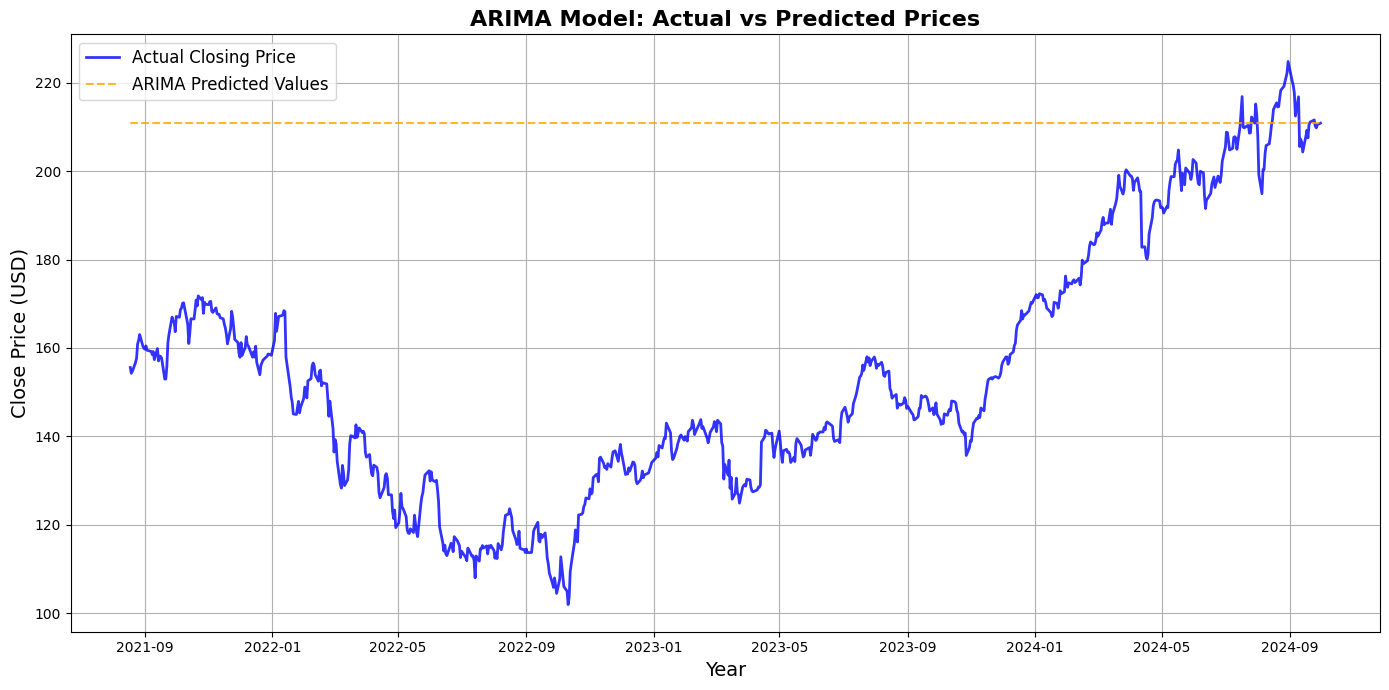

In [13]:
import matplotlib.pyplot as plt

# Generate predictions on the test data
test_forecast = arima_fit.forecast(steps=len(test_target))

# Plotting the Actual vs Predicted prices
plt.figure(figsize=(14, 7))
plt.plot(test_target.index, test_target, label='Actual Closing Price', color='blue', linewidth=2, alpha=0.8)
plt.plot(test_target.index, test_forecast, label='ARIMA Predicted Values', color='orange', linestyle='--',  alpha=0.8)
plt.title("ARIMA Model: Actual vs Predicted Prices", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Close Price (USD)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
# Future Predictions for the next 24 months
future_months = 24
future_forecast = arima_fit.forecast(steps=future_months)

# Generate future dates
future_dates = pd.date_range(start=data.index[-1], periods=future_months + 1, freq='ME')[1:]

# Inverse transform future predictions to original scale
future_predictions_inversed = forecast_scaler.inverse_transform(future_forecast.values.reshape(-1, 1))

# Create a DataFrame for future predictions
future_df = pd.DataFrame({'Date': future_dates, 'Predicted_Close': future_predictions_inversed.flatten()})
future_df.set_index('Date', inplace=True)

#print the predictions
print("Future Predictions for the next 24 Months:")
print(future_df)


Future Predictions for the next 24 Months:
            Predicted_Close
Date                       
2024-10-31     21712.384545
2024-11-30     21706.447193
2024-12-31     21713.015712
2025-01-31     21706.861407
2025-02-28     21711.863399
2025-03-31     21708.417846
2025-04-30     21710.211642
2025-05-31     21709.917261
2025-06-30     21709.032054
2025-07-31     21710.693260
2025-08-31     21708.668378
2025-09-30     21710.694087
2025-10-31     21708.943422
2025-11-30     21710.246817
2025-12-31     21709.460713
2026-01-31     21709.746708
2026-02-28     21709.879706
2026-03-31     21709.446380
2026-04-30     21710.048980
2026-05-31     21709.399742
2026-06-30     21709.996071
2026-07-31     21709.521103
2026-08-31     21709.839202
2026-09-30     21709.683610


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


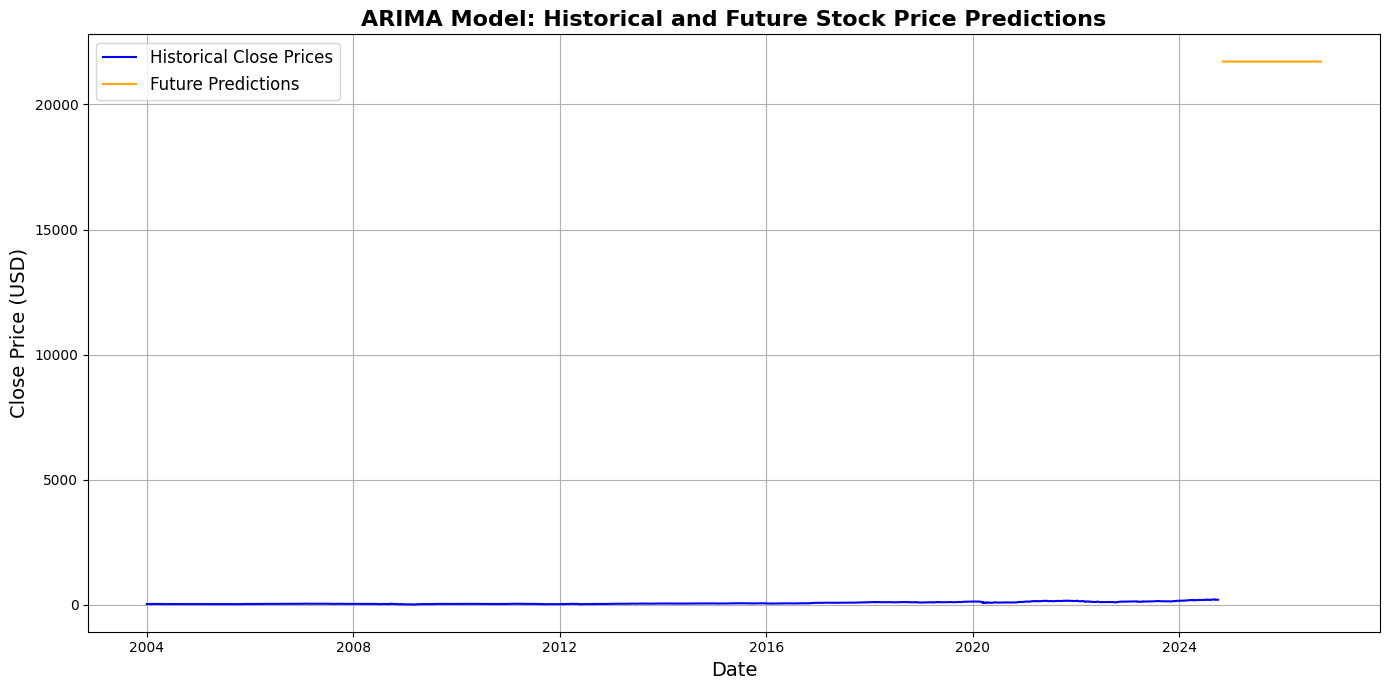

In [15]:
# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(close_prices.index, close_prices, label='Historical Close Prices', color='blue')
plt.plot(future_df.index, future_df['Predicted_Close'], label='Future Predictions', color='orange')
plt.title('ARIMA Model: Historical and Future Stock Price Predictions', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price (USD)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


# LSTM Model


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - loss: 0.0134 - val_loss: 0.0020
Epoch 2/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.4836e-04 - val_loss: 0.0010
Epoch 3/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0727e-04 - val_loss: 7.8362e-04
Epoch 4/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.1825e-04 - val_loss: 7.5496e-04
Epoch 5/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.0842e-04 - val_loss: 6.4622e-04
Epoch 6/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.8421e-04 - val_loss: 5.7831e-04
Epoch 7/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.6501e-04 - val_loss: 6.3561e-04
Epoch 8/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.6320e-04 - val_loss: 5.0983e-04
Epoch 9/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.5074e-04 - val_loss: 5.0277e-04
Epoch 10/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.4332e-04 - val_loss: 4.7543e-04
Epoch 11/50
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.3921

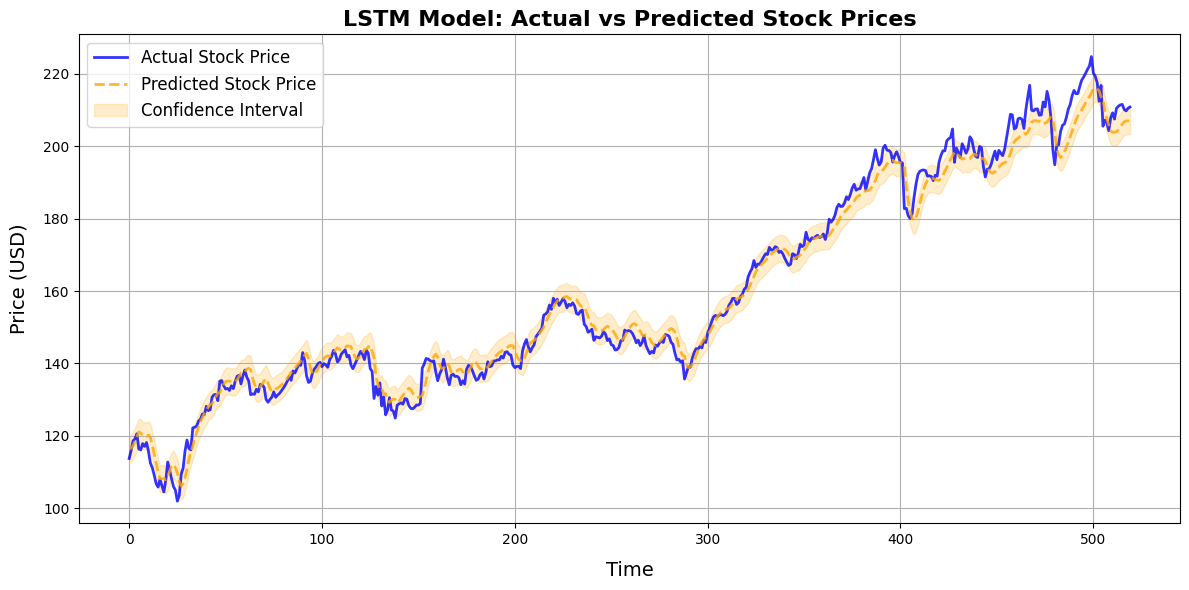

In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Preparing Data for LSTM Model
data = data.sort_index()
close_prices = data['Close'].values.reshape(-1, 1)

# Normalize the close price using MinMaxScaler
scaler_close = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler_close.fit_transform(close_prices)

# Define the number of time steps (look-back period) for LSTM
time_steps = 30

# Create sequences from residuals for LSTM input
X, y = [], []
for i in range(len(scaled_prices) - time_steps):
    X.append(scaled_prices[i:i + time_steps])
    y.append(scaled_prices[i + time_steps])
X, y = np.array(X), np.array(y)

# Split into training and validation sets (80% train, 20% validation)
train_size = int(0.8 * len(X))
val_size = int(0.1 * len(X))
test_size = len(X) - train_size - val_size

X_train, X_val, X_test = X[:train_size], X[train_size:train_size + val_size], X[train_size + val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size + val_size], y[train_size + val_size:]

# Build the LSTM Model
model = Sequential([
    LSTM(100, activation='relu', return_sequences=True, input_shape=(time_steps, 1)),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=32, verbose=1)

# Evaluate on test data
y_pred_scaled = model.predict(X_test)
y_pred = scaler_close.inverse_transform(y_pred_scaled)
y_actual = scaler_close.inverse_transform(y_test)

mae = mean_absolute_error(y_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
r2 = r2_score(y_actual, y_pred)
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")

std_dev = np.std(y_pred- y_actual)
lower_bound = y_pred - std_dev
upper_bound = y_pred + std_dev

# Plot Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(y_actual, label='Actual Stock Price', color='blue', linewidth=2, alpha=0.8)
plt.plot(y_pred, label='Predicted Stock Price', color='orange', linestyle='--', linewidth=2, alpha=0.8)
plt.fill_between(range(len(y_pred)), lower_bound.flatten(), upper_bound.flatten(), color='orange', alpha=0.2, label='Confidence Interval')
plt.title('LSTM Model: Actual vs Predicted Stock Prices', fontweight='bold', fontsize=16)
plt.xlabel('Time', fontsize=14, labelpad=10)
plt.ylabel('Price (USD)', fontsize=14, labelpad=10)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()



In [17]:
# Future Predictions for the next 24 months
future_months = 24
last_sequence = X_val[-1]

future_predictions = []
for _ in range(future_months):
    next_prediction = model.predict(last_sequence.reshape(1, time_steps, 1))
    future_predictions.append(next_prediction[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = next_prediction

# Inverse transform future predictions to original scale
future_predictions = scaler_close.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Generate future dates
last_date = pd.to_datetime(data.index[-1])
future_dates = pd.date_range(start=last_date, periods=future_months + 1, freq='ME')[1:]

# Print future predictions
print(future_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
            Predicted_Close
Date                       
2024-10-31     21712.384545
202

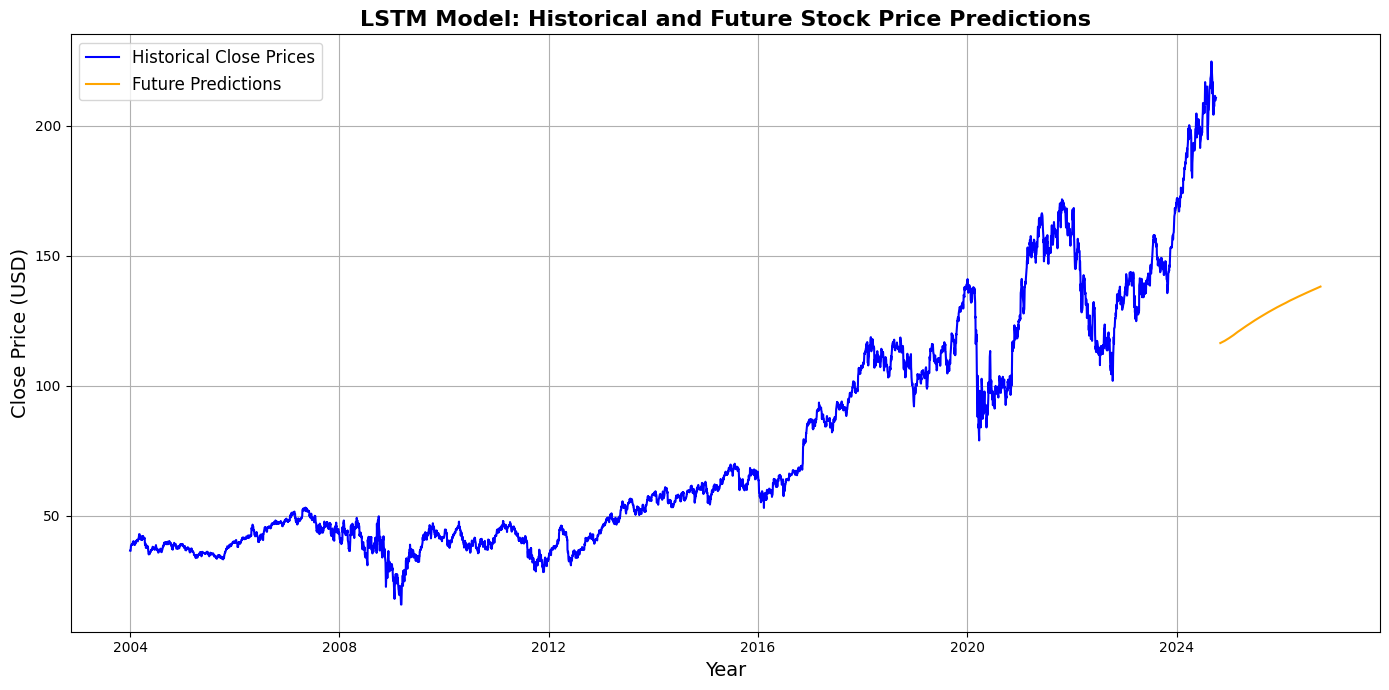

In [18]:
# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Historical Close Prices', color='blue')
plt.plot(future_dates, future_predictions, label='Future Predictions', color='orange')
plt.title('LSTM Model: Historical and Future Stock Price Predictions', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Close Price (USD)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# XGBoost Model

In [19]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import random

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

# Selecting features for XGBoost - 'Open', 'High', 'Low', 'Close', 'Volume'
features = data[['Open', 'High', 'Low', 'Volume']]
target = data['Close']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=SEED)

# Initialize the XGBoost Regressor
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, max_depth=6, learning_rate=0.03, random_state=SEED)

# Train the model
xgboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgboost_model.predict(X_test)

# Calculate Evaluation Metrics for XGBoost model on test data
mae_xgboost = mean_absolute_error(y_test, y_pred)
rmse_xgboost = np.sqrt(mean_squared_error(y_test, y_pred))
r2_xgboost = r2_score(y_test, y_pred)

# Print Evaluation Metrics for XGBoost model on test data
print("Evaluation Metrics for XGBoost model on test data:")
print(f"MAE: {mae_xgboost}")
print(f"RMSE: {rmse_xgboost}")
print(f"R-squared: {r2_xgboost}")




Evaluation Metrics for XGBoost model on test data:
MAE: 0.5083266023334705
RMSE: 0.7828255452102302
R-squared: 0.9996893506630126


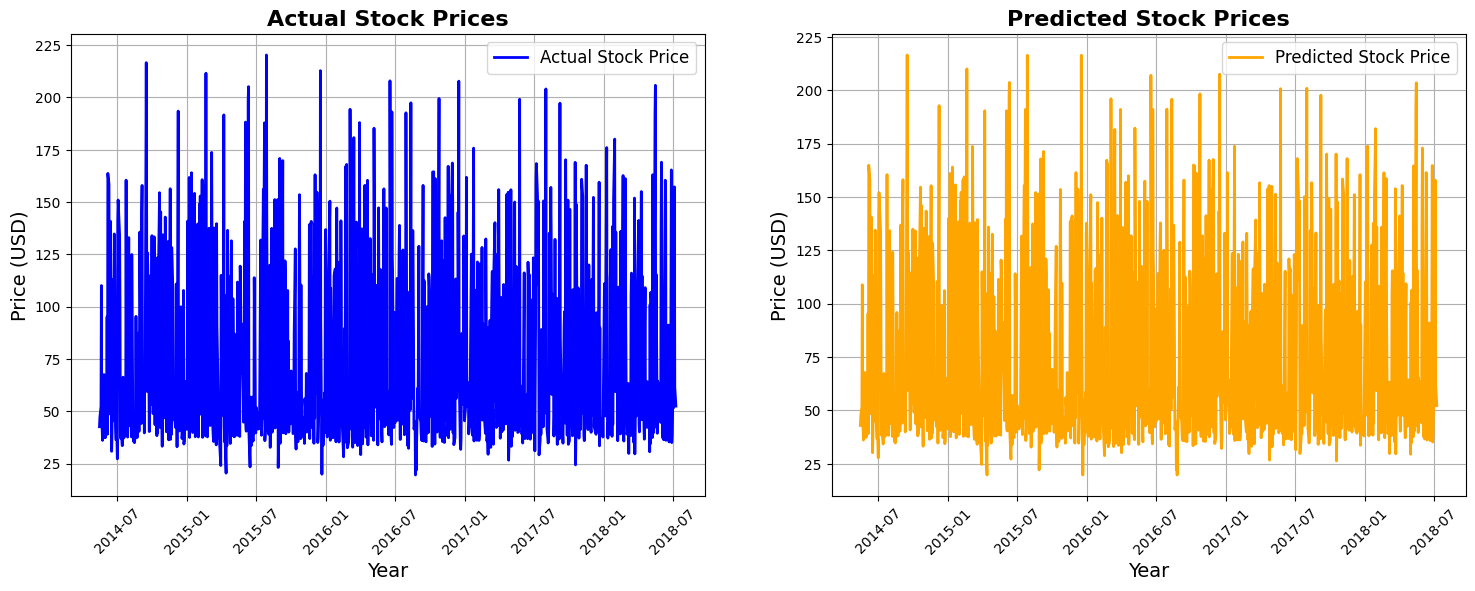

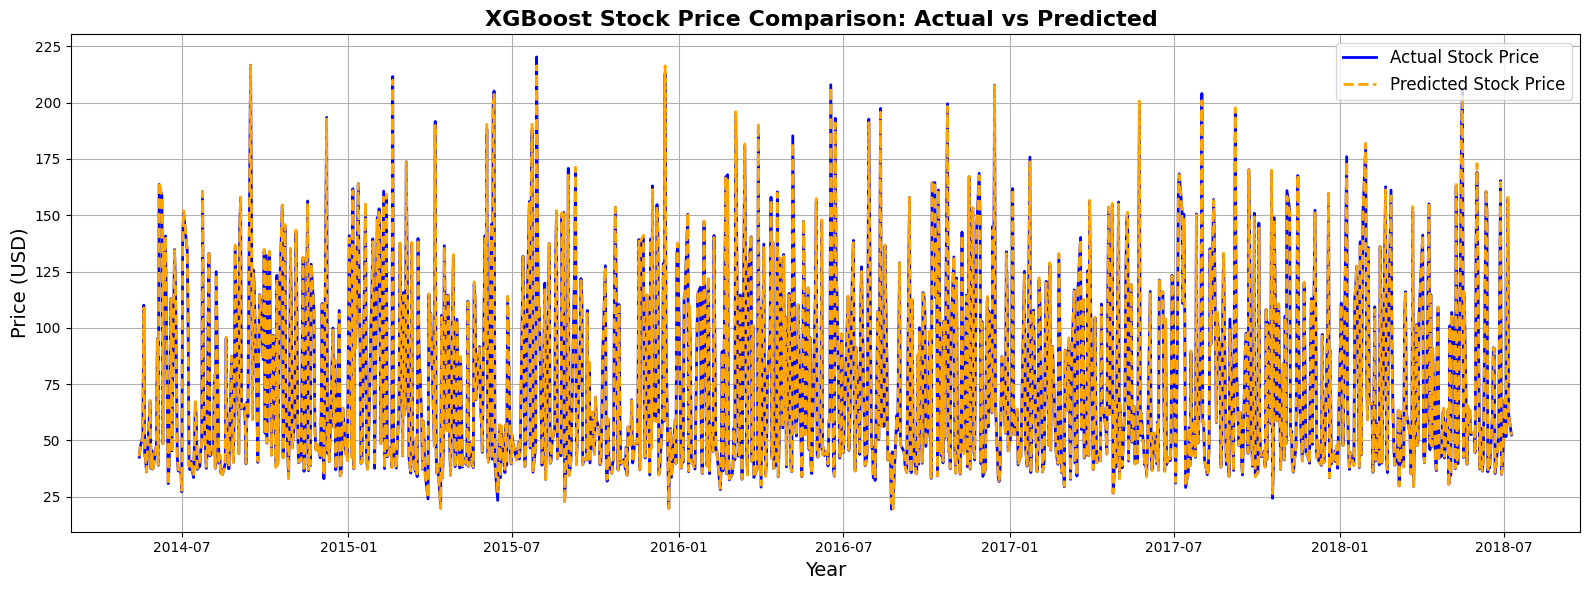

In [20]:
# Define the actual and predicted values
actual_prices = y_test
predicted_prices = y_pred

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))


#plot for Actual stock prices
axes[0].plot(train_data.index[len(train_data) - len(actual_prices):], actual_prices, label='Actual Stock Price', color='blue', linewidth=2)
axes[0].set_title('Actual Stock Prices', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Year', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel('Price (USD)', fontsize=14)
axes[0].legend(fontsize=12)
axes[0].grid(True)

#plot for Predicted stock prices
axes[1].plot(train_data.index[len(train_data) - len(actual_prices):], predicted_prices, label='Predicted Stock Price', color='orange', linewidth=2)
axes[1].set_title('Predicted Stock Prices', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Year', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylabel('Price (USD)', fontsize=14)
axes[1].legend(fontsize=12)
axes[1].grid(True)

# Plotting the actual vs predicted stock prices
plt.figure(figsize=(16, 6))
plt.plot(train_data.index[len(train_data) - len(actual_prices):], actual_prices, label='Actual Stock Price', color='blue', linewidth=2)
plt.plot(train_data.index[len(train_data) - len(actual_prices):], predicted_prices, label='Predicted Stock Price', color='orange', linestyle='--', linewidth=2)
plt.title('XGBoost Stock Price Comparison: Actual vs Predicted ', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
# Prepare data for 24 months of future predictions
future_months = 24

# Using the last available data point as the starting point for future predictions
last_features = features.iloc[-1].values.reshape(1, -1)
future_predictions = []

for _ in range(future_months):
    next_prediction = xgboost_model.predict(last_features)
    future_predictions.append(next_prediction[0])

# Adjust features dynamically based on past trends
    new_features = last_features[0]
    new_features[0] = new_features[0] * 1.005
    new_features[1] = max(new_features[0], new_features[1] * 1.004)
    new_features[2] = min(new_features[0], new_features[2] * 0.996)
    new_features[3] = new_features[3] * 0.99

    last_features = np.array(new_features).reshape(1, -1)

# Convert future predictions to a DataFrame
future_dates = pd.date_range(start=train_data.index[-1], periods=future_months + 1, freq='ME')[1:]
future_predictions_df = pd.DataFrame({'Date': future_dates, 'Predicted_Close': future_predictions})

# Print future predictions
print("Future Predictions for the next 24 months:")
print(future_predictions_df)


Future Predictions for the next 24 months:
         Date  Predicted_Close
0  2018-08-31       207.719788
1  2018-09-30       209.271973
2  2018-10-31       209.271973
3  2018-11-30       209.271973
4  2018-12-31       207.731384
5  2019-01-31       207.637512
6  2019-02-28       207.637512
7  2019-03-31       206.380920
8  2019-04-30       206.380920
9  2019-05-31       203.950027
10 2019-06-30       203.926987
11 2019-07-31       203.693573
12 2019-08-31       203.964005
13 2019-09-30       202.767593
14 2019-10-31       202.767593
15 2019-11-30       202.767593
16 2019-12-31       203.374512
17 2020-01-31       203.374512
18 2020-02-29       200.802338
19 2020-03-31       200.802338
20 2020-04-30       200.802338
21 2020-05-31       200.802338
22 2020-06-30       200.720963
23 2020-07-31       200.720963


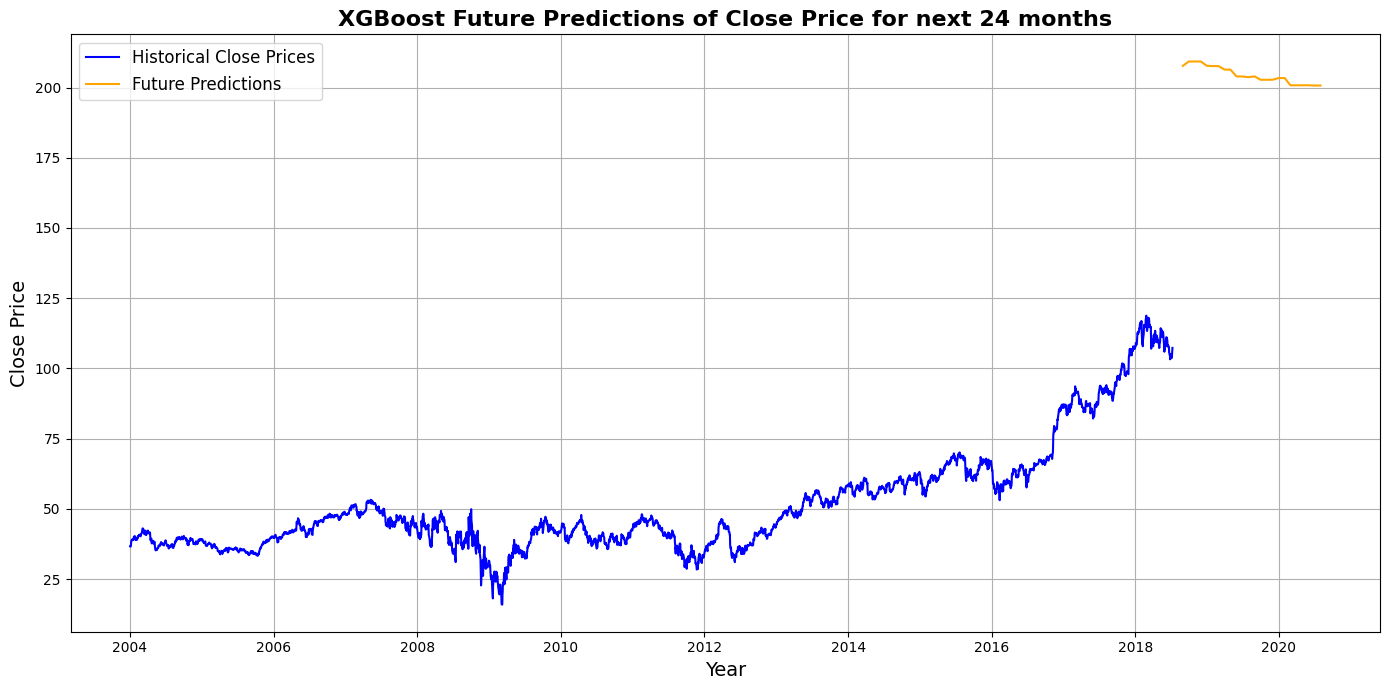

In [22]:
# Plot historical data and future predictions
plt.figure(figsize=(14, 7))
#plt.plot(train_data.index, train_data['Close'], label='Historical Close Prices', color='blue')
plt.plot(data.index[:len(train_data)], data['Close'][:len(train_data)], label='Historical Close Prices', color='blue')
plt.plot(future_predictions_df['Date'], future_predictions_df['Predicted_Close'], label='Future Predictions', color='orange')
plt.title('XGBoost Future Predictions of Close Price for next 24 months', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# **HYBRID MODEL (ARIMA+LSTM)**

In [23]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
df = pd.read_csv('/content/JPM-Multiverse.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
data = df['Close'].values

In [25]:
# Split data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]


In [26]:
from pmdarima import auto_arima

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

auto_arima_order = auto_arima(train_target, seasonal=False, stepwise=True, suppress_warnings=True, trace=True)
optimal_order = auto_arima_order.order
print(f"Optimal ARIMA Order: {optimal_order}")

arima_model = ARIMA(train_target, order=optimal_order)
arima_model_fit = arima_model.fit()
arima_forecast = arima_model_fit.predict(start=len(train_target), end=len(train_target) + len(test) - 1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10089.841, Time=4.78 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10124.696, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10097.401, Time=0.13 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10094.914, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10124.158, Time=0.09 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10087.949, Time=1.76 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=10091.991, Time=0.50 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10088.819, Time=1.03 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10089.719, Time=2.37 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=10093.786, Time=0.64 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10088.097, Time=1.98 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=10091.160, Time=5.00 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=10088.461, Time=0.76 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 19.637 seconds
Optimal ARIMA Order: (1, 1, 2)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

In [27]:
# Generate ARIMA predictions
arima_residuals = test - arima_forecast

scaler = MinMaxScaler(feature_range=(0, 1))
train_residuals_scaled = scaler.fit_transform(arima_residuals.values.reshape(-1, 1))

In [28]:
# Helper function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10

In [29]:
#Prepare LSTM data
X_train_lstm, y_train_lstm = create_sequences(train_residuals_scaled, seq_length)

# Build the LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)


In [31]:
# Train the LSTM model
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1)


Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0966
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0064
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0044
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0035
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0034
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0027
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0032
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0031
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0030
Epoch 13/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0024
Epoch 14/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0026
Epoch 15/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028
Epoch 16/50
33/33 

In [32]:
test_residuals_scaled = scaler.transform(arima_residuals.values.reshape(-1, 1))
X_test_lstm, _ = create_sequences(test_residuals_scaled, seq_length)

# Predict residuals using LSTM
lstm_forecast = lstm_model.predict(X_test_lstm)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [33]:
# Combine ARIMA forecast and LSTM residual forecast
lstm_forecast_unscaled = scaler.inverse_transform(lstm_forecast)
hybrid_forecast = arima_forecast[seq_length:] + lstm_forecast_unscaled.ravel()

In [34]:
mae = mean_absolute_error(test[seq_length:], hybrid_forecast)
rmse = np.sqrt(mean_squared_error(test[seq_length:], hybrid_forecast))
r2 = r2_score(test[seq_length:], hybrid_forecast)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MAE: 2.8912912705947895
RMSE: 3.752895874026348
R² Score: 0.9827346352150722


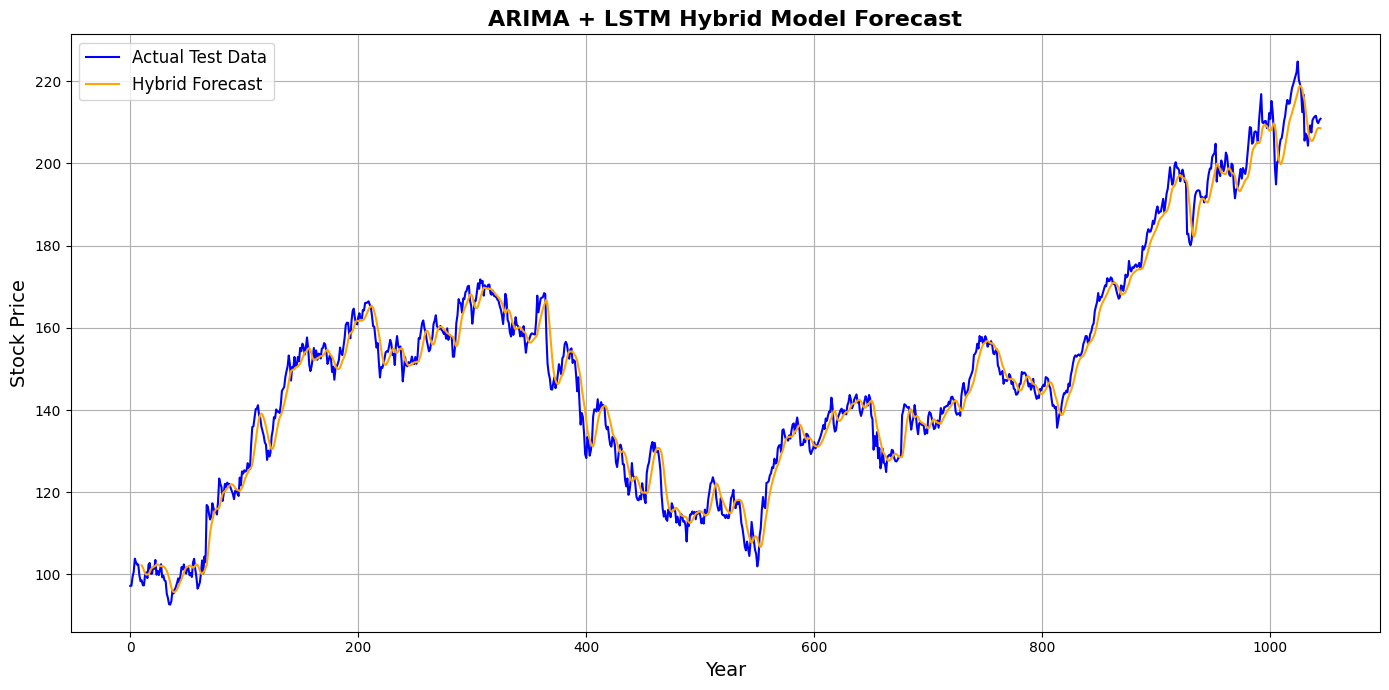

In [35]:
# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(test, label='Actual Test Data', color='blue')
plt.plot(range(seq_length, len(test)), hybrid_forecast, label='Hybrid Forecast', color='orange')
#plt.fill_between(range(seq_length, len(test)), hybrid_forecast - np.sqrt(mean_squared_error(test[seq_length:], hybrid_forecast)), hybrid_forecast + np.sqrt(mean_squared_error(test[seq_length:], hybrid_forecast))) # Use np.sqrt(mean_squared_error(...)) for upper bound calculation as well
plt.title('ARIMA + LSTM Hybrid Model Forecast', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
# Future Predictions
future_months = 24

arima_future_forecast = arima_model_fit.forecast(steps=future_months)

# Initialize LSTM future predictions with last sequence from test residuals
last_sequence = test_residuals_scaled[-seq_length:]
future_residuals = []

for _ in range(future_months):
    next_residual = lstm_model.predict(last_sequence.reshape(1, seq_length, 1))
    future_residuals.append(next_residual[0, 0])

    # Update the sequence with the new residual
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = next_residual

# Inverse transform LSTM residuals
future_residuals_unscaled = scaler.inverse_transform(np.array(future_residuals).reshape(-1, 1)).ravel()

# Combine ARIMA and LSTM predictions for the future
future_hybrid_forecast = arima_future_forecast + future_residuals_unscaled

# Create future dates
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_months + 1, freq='ME')[1:]

# Create DataFrame for future predictions
future_predictions_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Close': future_hybrid_forecast
})

print(future_predictions_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
           Date  Predicted_Close
3654 2024-10-31       208.911891
3655 2024-11-30       208.517718
3656 2024-12-31       207.980181
3657 2025-01-31       207.412275

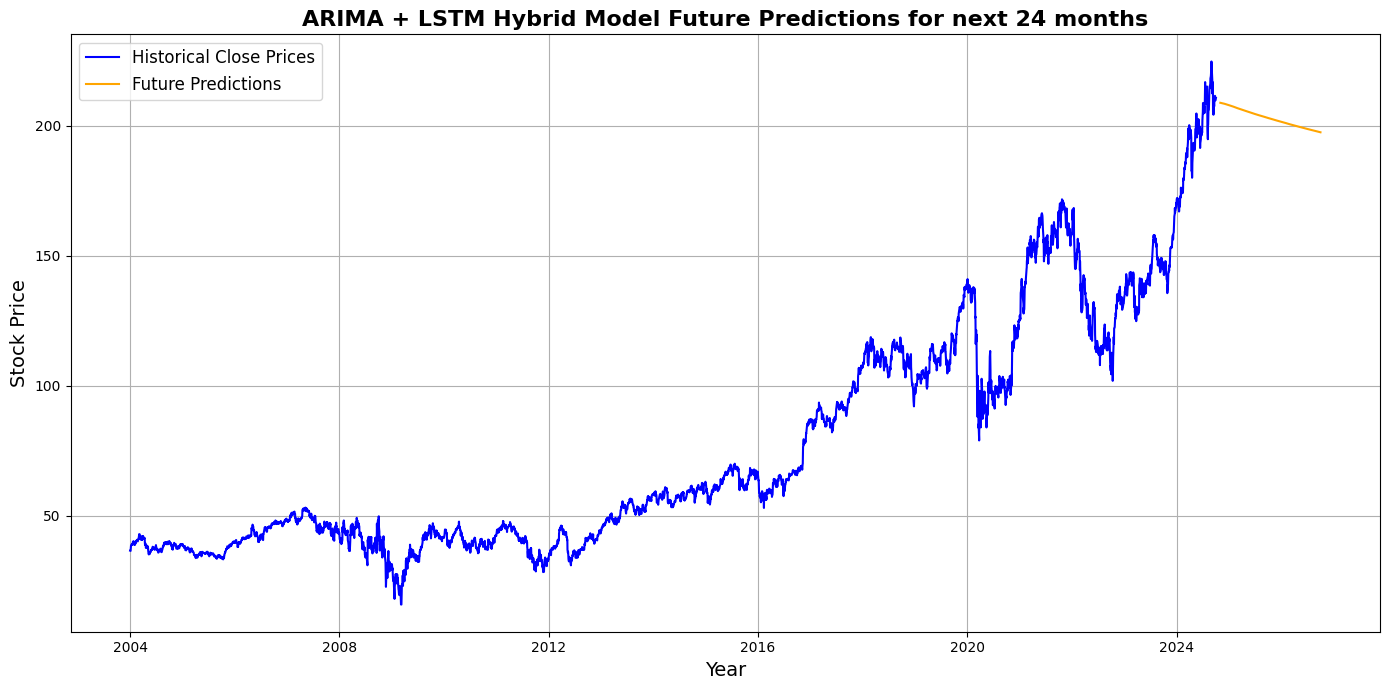

In [37]:
# Plot historical data and future predictions
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Historical Close Prices', color='blue')
plt.plot(future_predictions_df['Date'], future_predictions_df['Predicted_Close'], label='Future Predictions', color='orange')
plt.title('ARIMA + LSTM Hybrid Model Future Predictions for next 24 months', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# **COVID & GREAT RECESSION Impacts on JPMorgan's stock prices**

In [38]:
import pandas as pd

In [39]:
!pip install plotly
import plotly.graph_objects as go

In [40]:
#Creating New DataFrame with closing prices and corresponding dates
data_df = pd.DataFrame({'Date': df.index, 'Close': df['Close'], 'Open': df['Open'],'High': df['High'], 'Low': df['Low'], 'Volume': df['Volume']})
data=df

#Setting 'Date' as the index of the DataFrame
data_df.set_index('Date', inplace=True)

# Filtering data for the Great Recession and COVID-19 pandemic
recession_data = data_df.loc['2007-12-01':'2009-06-30']
covid_data = data_df.loc['2020-03-01':'2020-12-31']

In [41]:
# Function to create a candlestick chart
def create_candlestick_chart(df, title):
    fig = go.Figure(data=[go.Candlestick(
        x=df.index,
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close']
    )])
    fig.update_layout(title=title,
                      xaxis_title="Date",
                      yaxis_title="Price (USD)",
                      xaxis_rangeslider_visible=False)
    fig.show()

# Create candlestick chart for Great Recession
create_candlestick_chart(recession_data, "JP Morgan Stock Price During the Great Recession (2007-2009)")

# Create candlestick chart for COVID-19 Pandemic
create_candlestick_chart(covid_data, "JP Morgan Stock Price During the COVID-19 Pandemic (2020)")


**Great Recession (2007-2009):**
JP Morgan's stock prices showed big drops and slight recoveries, with large fluctuations over time.
The downward trend lasted a long time, showing the slow recovery during the financial crisis.

**COVID-19 Pandemic (2020):**
During the COVID-19 pandemic, the stock price fell sharply in March 2020 but recovered quickly by the end of 2020.
The smaller fluctuations later in the year show the market stabilizing faster than during the Great Recession.

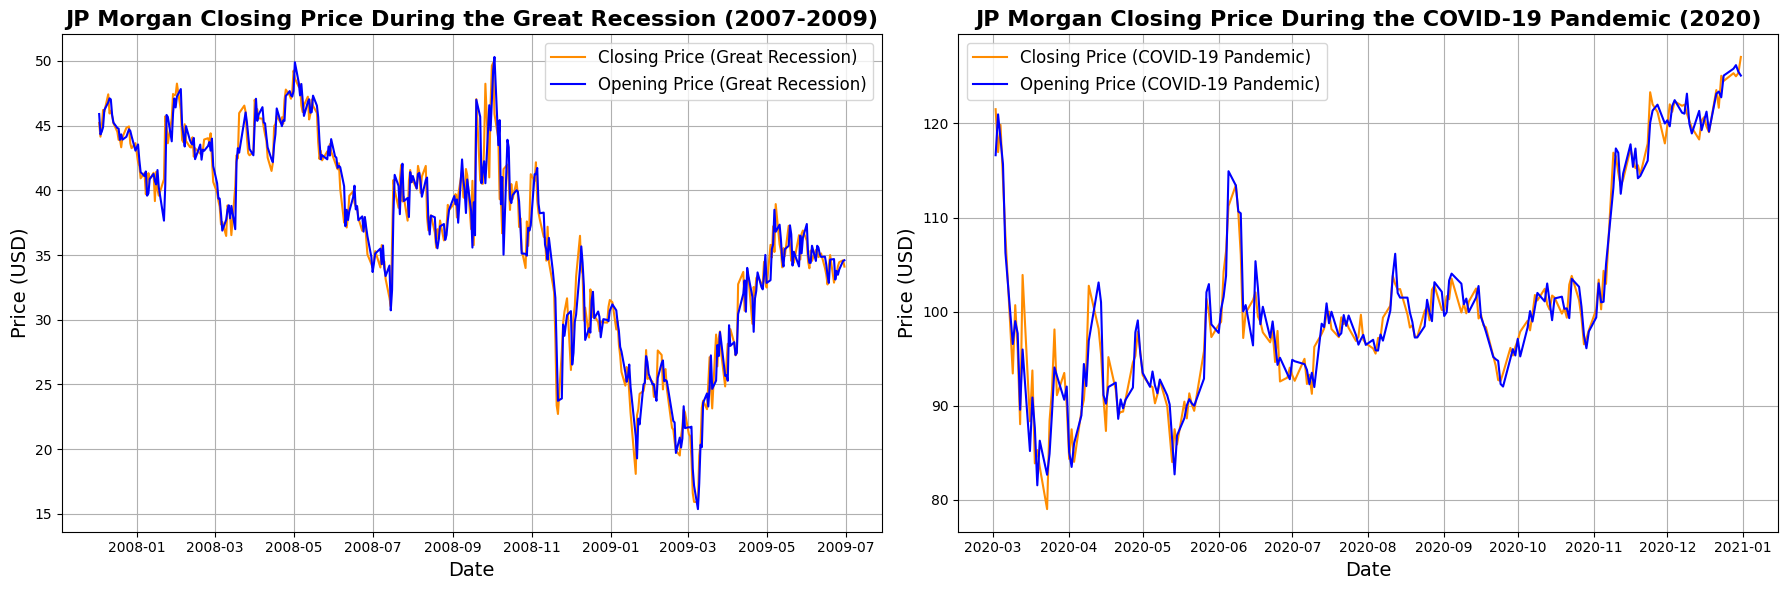

In [42]:
# Plotting the Opening & Closing Price during the Great Recession
fig, axes = plt.subplots(1,2, figsize=(18,6), sharey=False)

# Plot for the Great Recession
axes[0].plot(recession_data.index, recession_data['Close'], label='Closing Price (Great Recession)', color='darkorange')
axes[0].plot(recession_data.index, recession_data['Open'], label='Opening Price (Great Recession)', color='blue')
axes[0].set_title("JP Morgan Closing Price During the Great Recession (2007-2009)", fontsize=16, fontweight='bold')
axes[0].set_xlabel("Date", fontsize=14)
axes[0].set_ylabel("Price (USD)", fontsize=14)
axes[0].legend(fontsize=12)
axes[0].grid(True)


# Plotting the Opening & Closing Price during the COVID-19 Pandemic
axes[1].plot(covid_data.index, covid_data['Close'], label='Closing Price (COVID-19 Pandemic)', color='darkorange')
axes[1].plot(covid_data.index, covid_data['Open'], label='Opening Price (COVID-19 Pandemic)', color='blue')
axes[1].set_title("JP Morgan Closing Price During the COVID-19 Pandemic (2020)", fontsize=16, fontweight='bold')
axes[1].set_xlabel("Date", fontsize=14)
axes[1].set_ylabel("Price (USD)", fontsize=14)
axes[1].legend(fontsize=12)
axes[1].grid(True)
plt.tight_layout()
plt.show()

**Great Recession (2007-2009):** The Closing price fell significantly and showed high volatility, with frequent ups and downs. The stock experienced a steep decline during late 2008, reflecting market turmoil.

**COVID-19 Pandemic (2020):** Similarly, during the initial months of the COVID-19 pandemic, there was a sharp decline in the stock price, followed by a period of recovery towards the end of 2020. This reflects the market's initial negative reaction to the pandemic and subsequent stabilization as conditions improved.

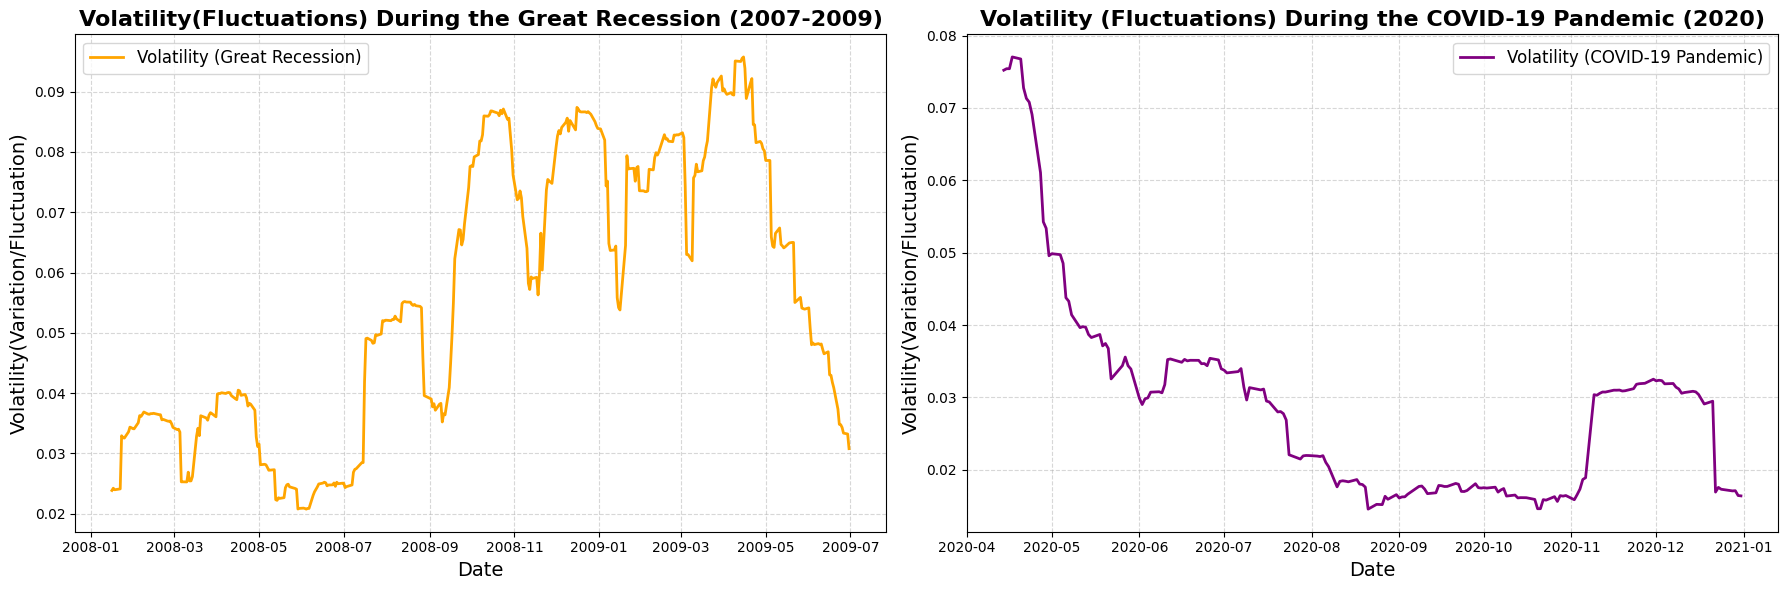

In [43]:
recession_data = data_df.loc['2007-12-01':'2009-06-30'].copy()
covid_data = data_df.loc['2020-03-01':'2020-12-31'].copy()

# Calculate daily returns and rolling volatility for Great Recession
recession_data['Daily Returns'] = recession_data['Close'].pct_change()
recession_data['Volatility'] = recession_data['Daily Returns'].rolling(window=30).std()

# Calculate daily returns and rolling volatility for COVID-19 Pandemic
covid_data['Daily Returns'] = covid_data['Close'].pct_change()
covid_data['Volatility'] = covid_data['Daily Returns'].rolling(window=30).std()

# Plot volatility comparison
fig, axes = plt.subplots(1,2, figsize=(18,6), sharey=False)

# Plot for the Great Recession
axes[0].plot(recession_data.index, recession_data['Volatility'], label='Volatility (Great Recession)', color='orange', linewidth=2)
axes[0].set_title("Volatility(Fluctuations) During the Great Recession (2007-2009)", fontsize=16, fontweight='bold')
axes[0].set_xlabel("Date", fontsize=14)
axes[0].set_ylabel("Volatility(Variation/Fluctuation)", fontsize=14)
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[0].legend(fontsize=12)

# Plot for the COVID-19 Pandemic
axes[1].plot(covid_data.index, covid_data['Volatility'], label='Volatility (COVID-19 Pandemic)', color='purple', linewidth=2)
axes[1].set_title("Volatility (Fluctuations) During the COVID-19 Pandemic (2020)", fontsize=16, fontweight='bold')
axes[1].set_xlabel("Date", fontsize=14)
axes[1].set_ylabel("Volatility(Variation/Fluctuation)", fontsize=14)
axes[1].grid(True, linestyle='--', alpha=0.5)
axes[1].legend(fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


**The Great Recessio**n saw a gradual rise in volatility, peaking in late 2008, with elevated levels persisting for a prolonged period due to systemic financial instability.
**The COVID-19 pandemic** caused a sharp volatility spike in March 2020, followed by a rapid decline as markets stabilized.
**The Great Recession** reflects sustained uncertainty, while **the COVID-19 pandemic** represents a short-term shock with quicker recovery. This comparison highlights the differences in market responses to these two major crises.

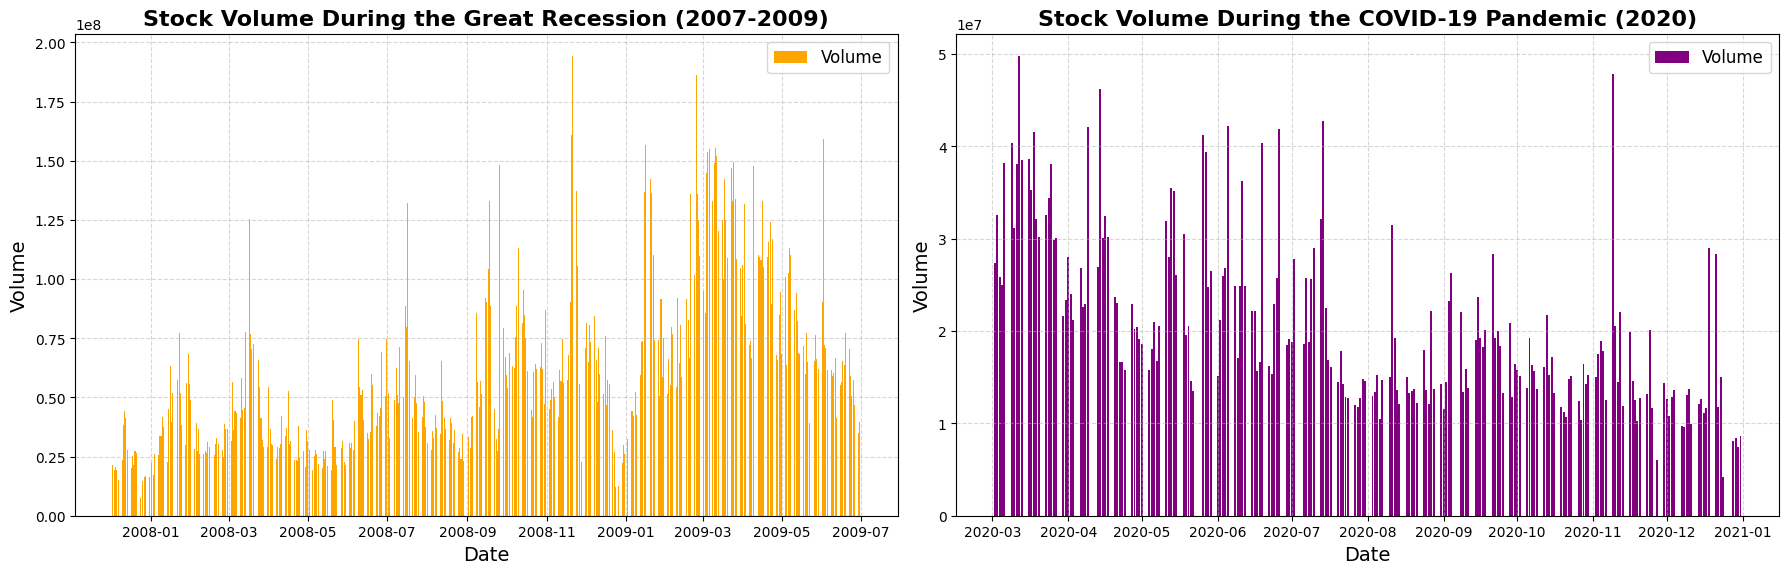

In [44]:
import matplotlib.pyplot as plt

# Side-by-side volume charts
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)

# Volume during the Great Recession
axes[0].bar(recession_data.index, recession_data['Volume'], color='orange', label='Volume')
axes[0].set_title("Stock Volume During the Great Recession (2007-2009)", fontsize=16, fontweight='bold')
axes[0].set_xlabel("Date", fontsize=14)
axes[0].set_ylabel("Volume", fontsize=14)
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[0].legend(fontsize=12)

# Volume during the COVID-19 Pandemic
axes[1].bar(covid_data.index, covid_data['Volume'], color='purple', label='Volume')
axes[1].set_title("Stock Volume During the COVID-19 Pandemic (2020)", fontsize=16, fontweight='bold')
axes[1].set_xlabel("Date", fontsize=14)
axes[1].set_ylabel("Volume", fontsize=14)
axes[1].grid(True, linestyle='--', alpha=0.5)
axes[1].legend(fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


**Great Recession**
Trading volume stayed high for a long time during the Great Recession, showing that investors were very uncertain and cautious.
The market adjusted slowly as the crisis continued.

**COVID-19 Pandemic**
During the COVID-19 Pandemic, trading volume spiked sharply at the start but returned to normal much faster than during the Great Recession.
This shows that the market adapted quickly to the crisis.

Great Recession Recovery Date: 2007-12-03 00:00:00
COVID-19 Recovery Date: 2020-03-02 00:00:00


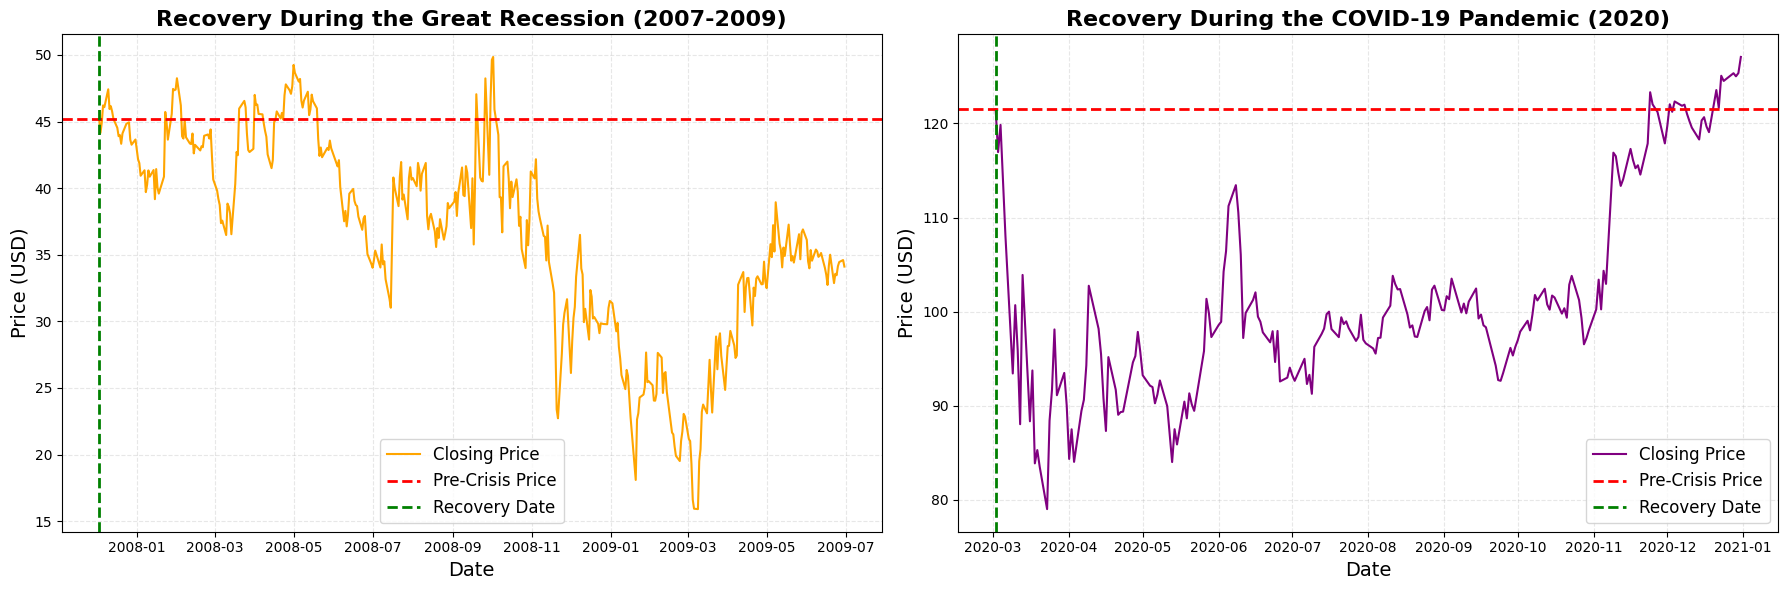

In [45]:
# Function to calculate recovery date
def calculate_recovery_date(df, pre_crisis_close):
    recovery_date = df[df['Close'] >= pre_crisis_close].index.min()
    return recovery_date

# Recovery analysis for Great Recession
pre_crisis_close_recession = recession_data['Close'].iloc[0]
recovery_date_recession = calculate_recovery_date(recession_data, pre_crisis_close_recession)
print(f"Great Recession Recovery Date: {recovery_date_recession}")

# Recovery analysis for COVID-19 Pandemic
pre_crisis_close_covid = covid_data['Close'].iloc[0]
recovery_date_covid = calculate_recovery_date(covid_data, pre_crisis_close_covid)
print(f"COVID-19 Recovery Date: {recovery_date_covid}")

fig, axes = plt.subplots(1,2, figsize=(18,6), sharey=False)
# Line plot to visualize recovery for Great Recession
axes[0].plot(recession_data.index, recession_data['Close'], label='Closing Price', color='orange')
axes[0].axhline(pre_crisis_close_recession, color='red', linestyle='--', linewidth=2, label='Pre-Crisis Price')
axes[0].axvline(recovery_date_recession, color='green', linestyle='--', linewidth=2, label='Recovery Date')
axes[0].set_title("Recovery During the Great Recession (2007-2009)", fontsize=16, fontweight='bold')
axes[0].set_xlabel("Date", fontsize=14)
axes[0].set_ylabel("Price (USD)", fontsize=14)
axes[0].grid(True, linestyle='--', alpha=0.3)
axes[0].legend(fontsize=12)

# Line plot to visualize recovery for COVID-19 Pandemic
axes[1].plot(covid_data.index, covid_data['Close'], label='Closing Price', color='purple')
axes[1].axhline(pre_crisis_close_covid, color='red', linestyle='--', linewidth=2, label='Pre-Crisis Price')
axes[1].axvline(recovery_date_covid, color='green', linestyle='--', linewidth=2, label='Recovery Date')
axes[1].set_title("Recovery During the COVID-19 Pandemic (2020)", fontsize=16, fontweight='bold')
axes[1].set_xlabel("Date", fontsize=14)
axes[1].set_ylabel("Price (USD)", fontsize=14)
axes[1].grid(True, linestyle='--', alpha=0.3)
axes[1].legend(fontsize=12)
plt.tight_layout()
plt.show()



**Recovery During the Great Recession (2007-2009)**
JP Morgan's stock price dropped significantly and took a long time to recover to its pre-crisis level, The price showed large fluctuations over time, reflecting ongoing market instability.

**Recovery During the COVID-19 Pandemic (2020)**
During the COVID-19 pandemic, the stock price dropped sharply but recovered much faster compared to the Great Recession. By the end of 2020, the price had returned to its pre-crisis level, showing a quicker recovery phase.